# Projektuppgift 1 - Kontinuerlig balk
*Tobias Ericsson, David Neinhardt*  
*2025-03-27*  
*MTM026*  

## Uppgift 2
*Kontrollera noggrant att resultaten är rimliga, exempelvis kan ni: studera balkens deformation för att försäkra er om att korrekta randvillkor är införda; studera moment- och tvärkraftsdiagrammen och säkerställa att relationerna mellan tvärkraft och fördelad last samt mellan moment och tvärkraft är uppfyllda. (Dvs de allmänna jämviktsekvationerna för en balk från kursen MTM021.) Spara figurer och plottar för följande resultat. Smidigast är att göra skärmdumpar och lägga dessa i ett dokument för redovisningen.*  
  
- *Balkens elementindelning (Mesh) och notera elementstorleken.*
- *Plotta deformerad balk (Total deformation). Notera största deformationen.*  
- *Rita T- och M-diagram (med tecken) (exempel Vz = Tvärkraft i z, My = moment kring y).*  
- *Ta fram fördelningen av största böjnormalspänning och bestäm maximal spänning. I ANSYS kan man beräkna följande resultat: Direct stress vilket motsvarar σ =N/A, samt Combined stress vilket motsvarar σ =N/A +M z/Iy.*  
- *Beräkna stödkrafterna och notera värdena: Solution →Insert →Probe →Force Reaction. Kontrollera summan av dessa mot en enkel handuträkning.*  
- *Gå tillbaka till Mesh och välj ett finare (tätare) nät genom att minska elementstorleken. Upprepa beräkningarna och kommentera speciellt på T- och M-diagrammen samt största normalspänning. Inom FEM säger man att lösningen har konvergerat om resultaten inte ändras med förfinat beräkningsnät - har er lösning konvergerat?*
---

### Balk elementarindelning
Med ett första försök på 0.1m elementindelningar får vi alla resultaten uppvisade nedan.  
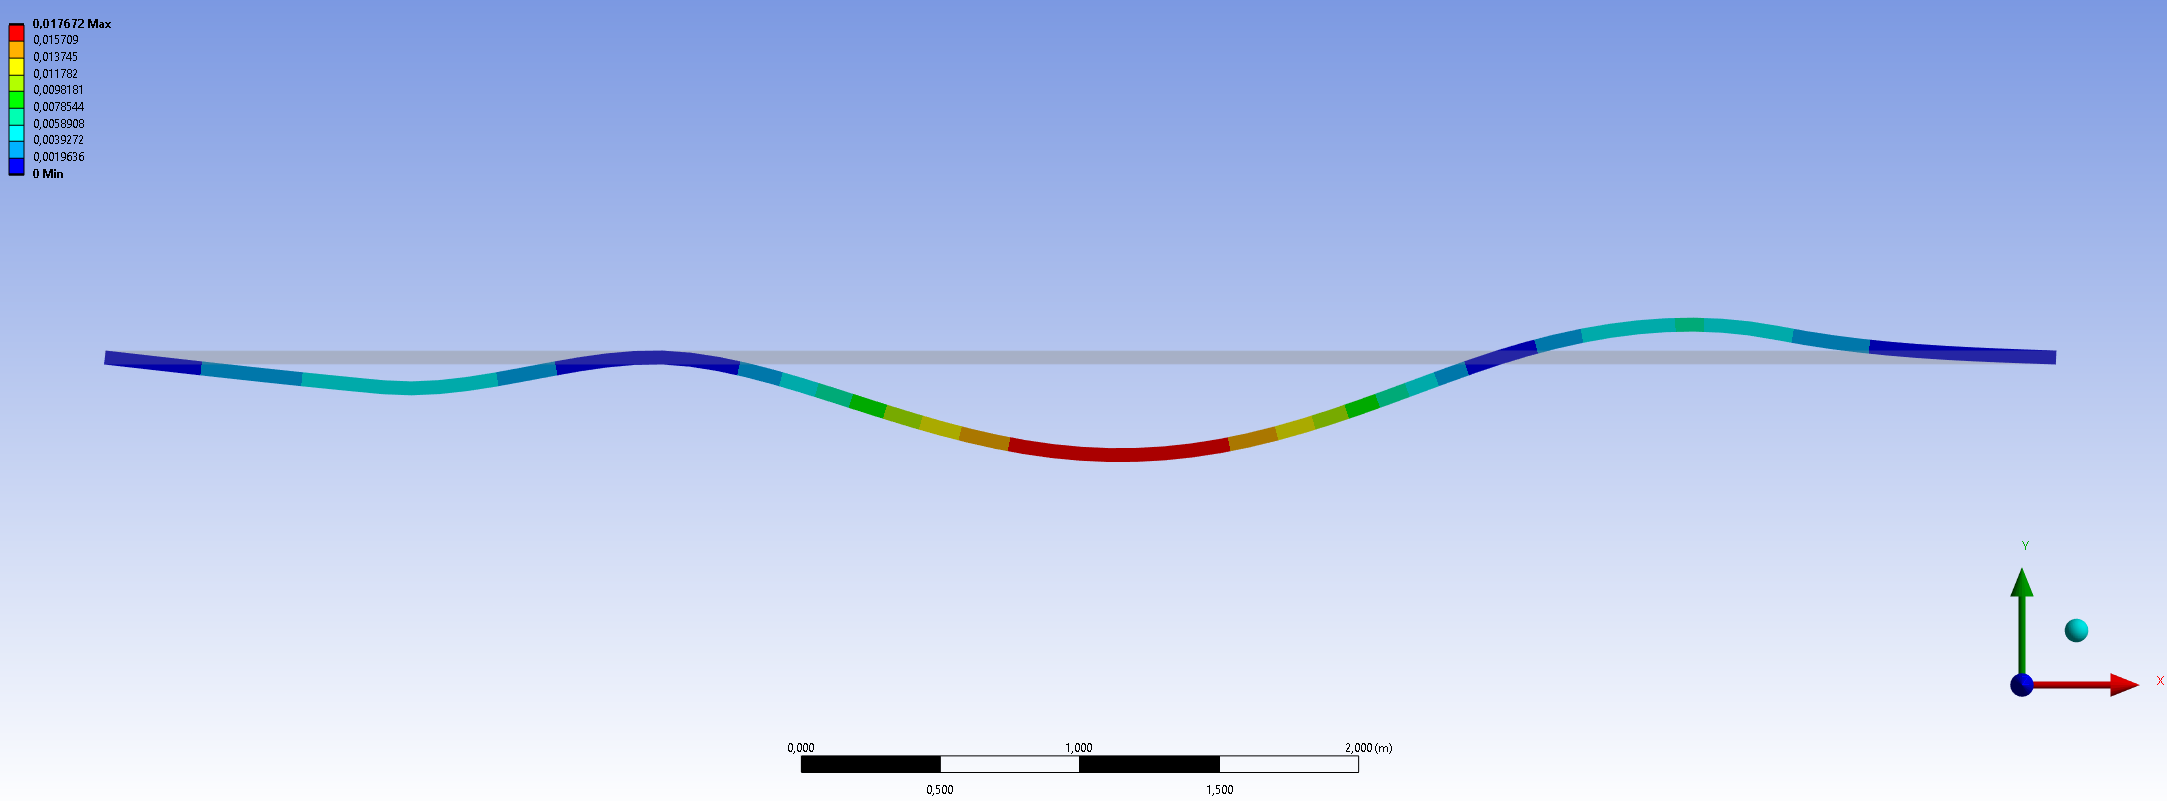
  
Ökar vi indelningen med en tiopotens till 0.01m så får vi samma resultat bortsett från lite error koder från chalmers datorer som ryter ifrån.  
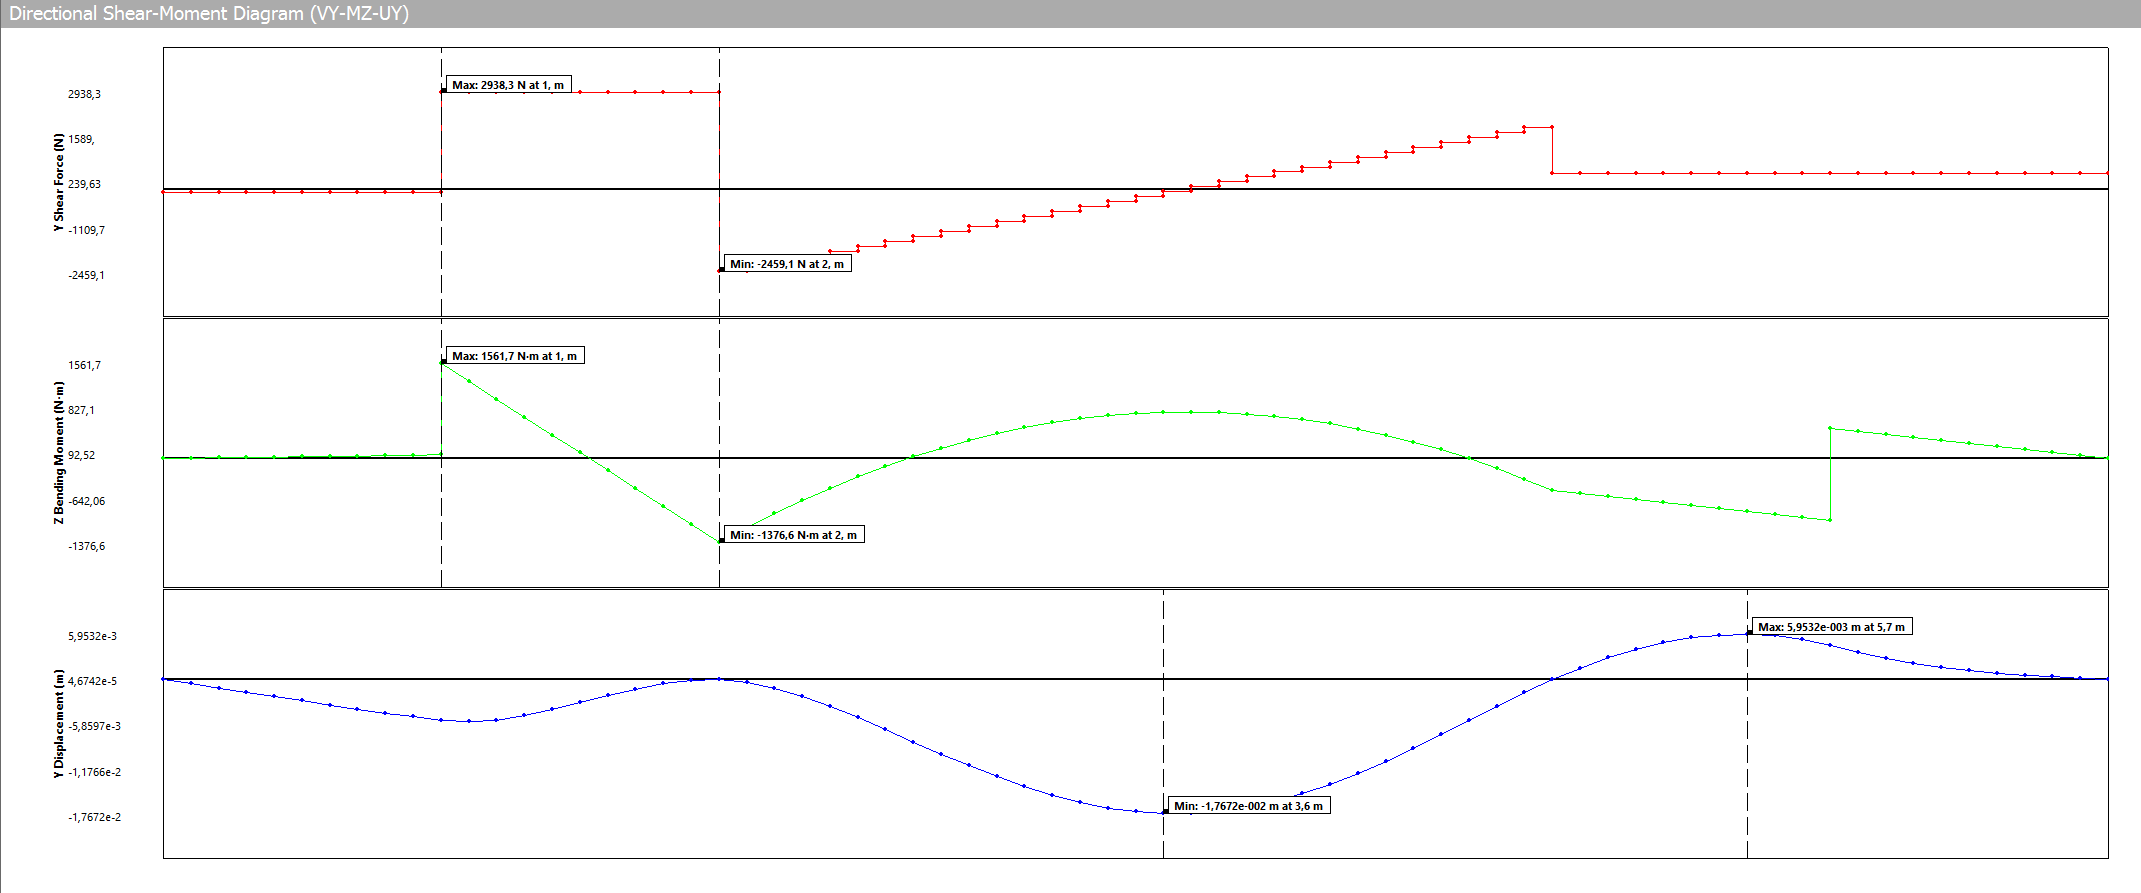
  
### Deformerad balk

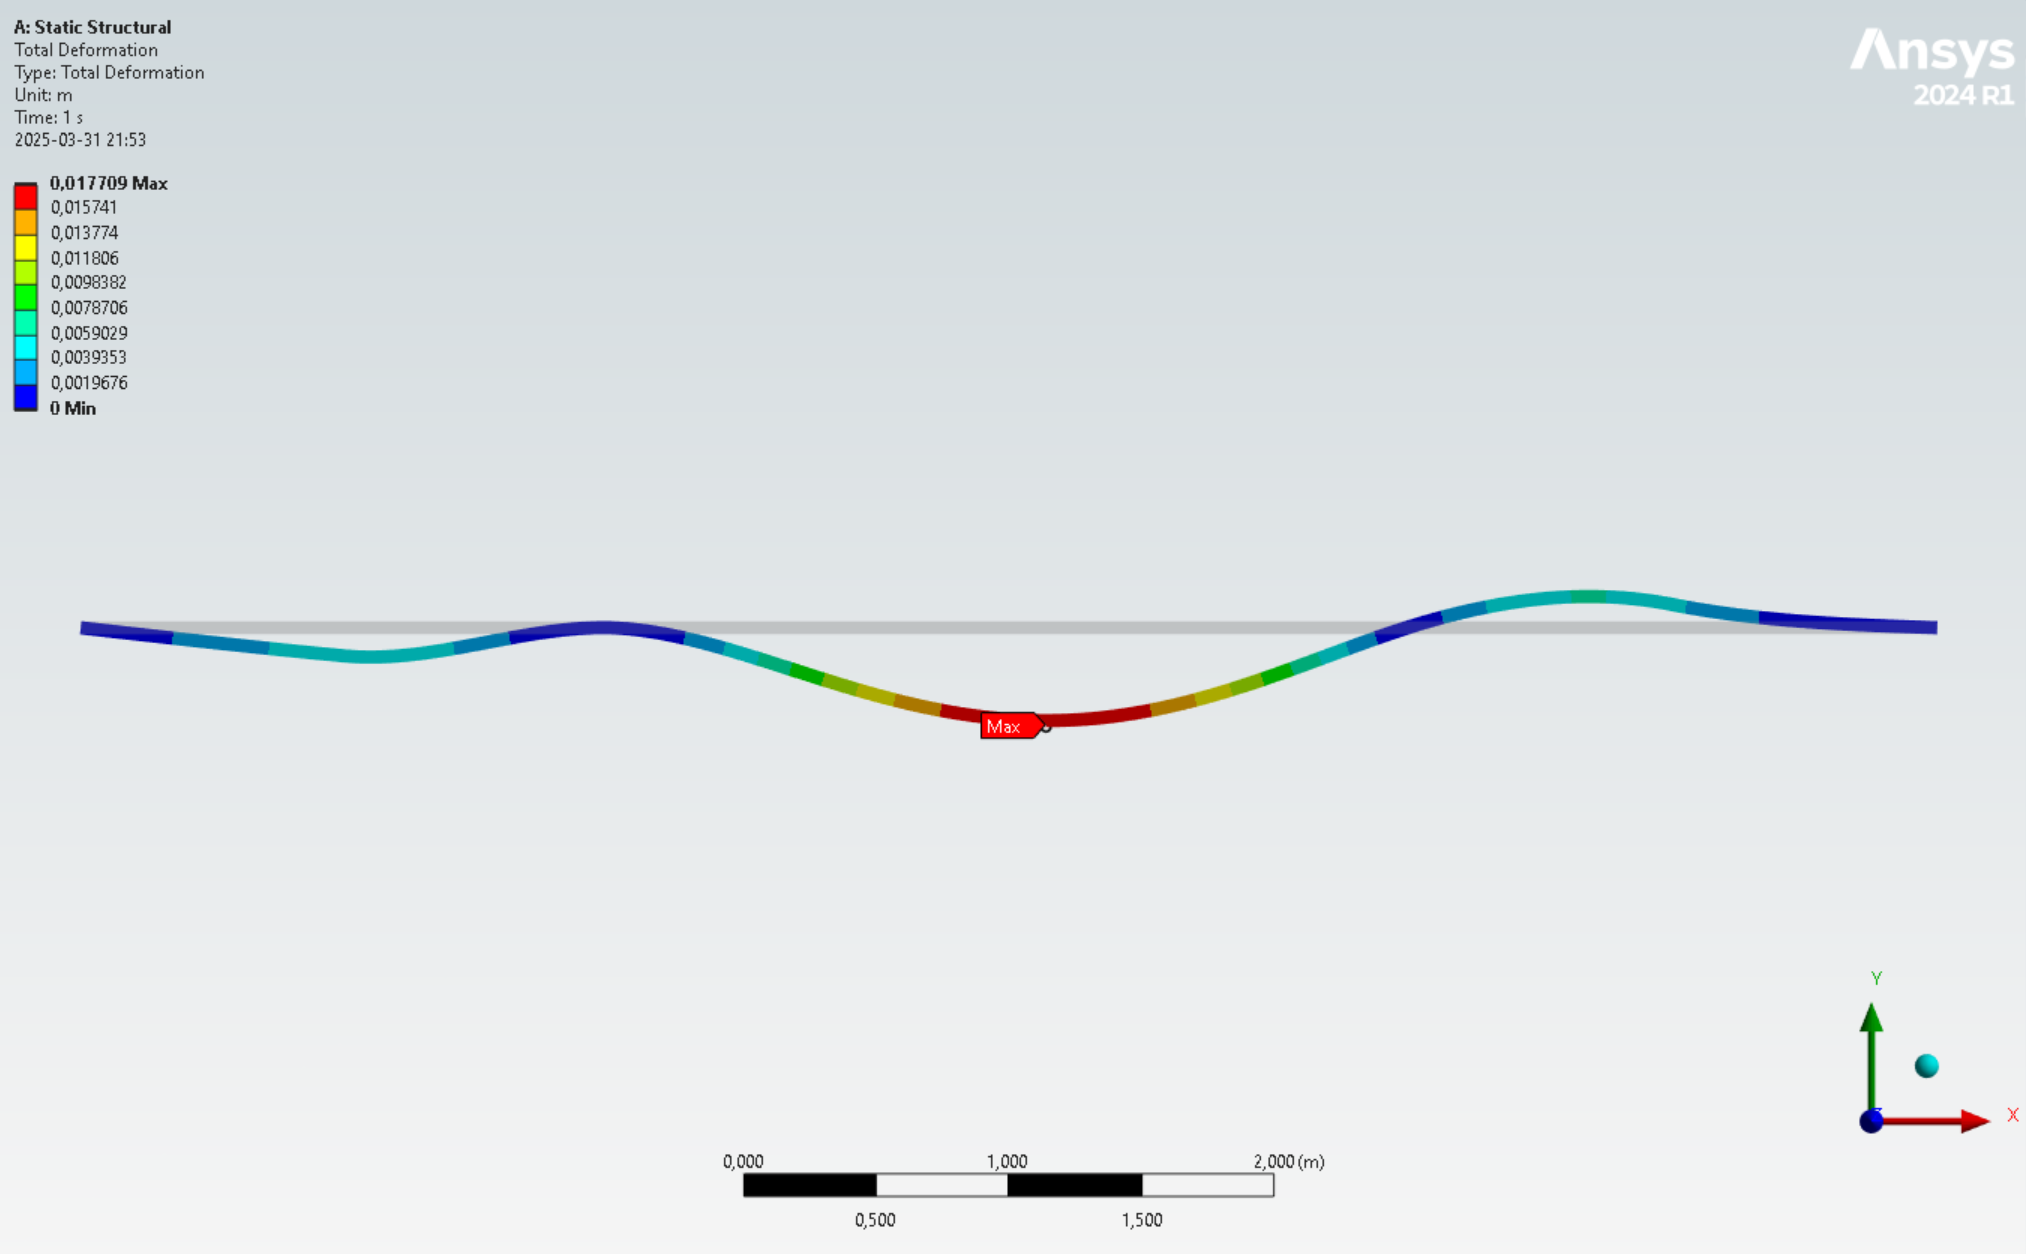
  
### Tvärkraft - och momentdiagram
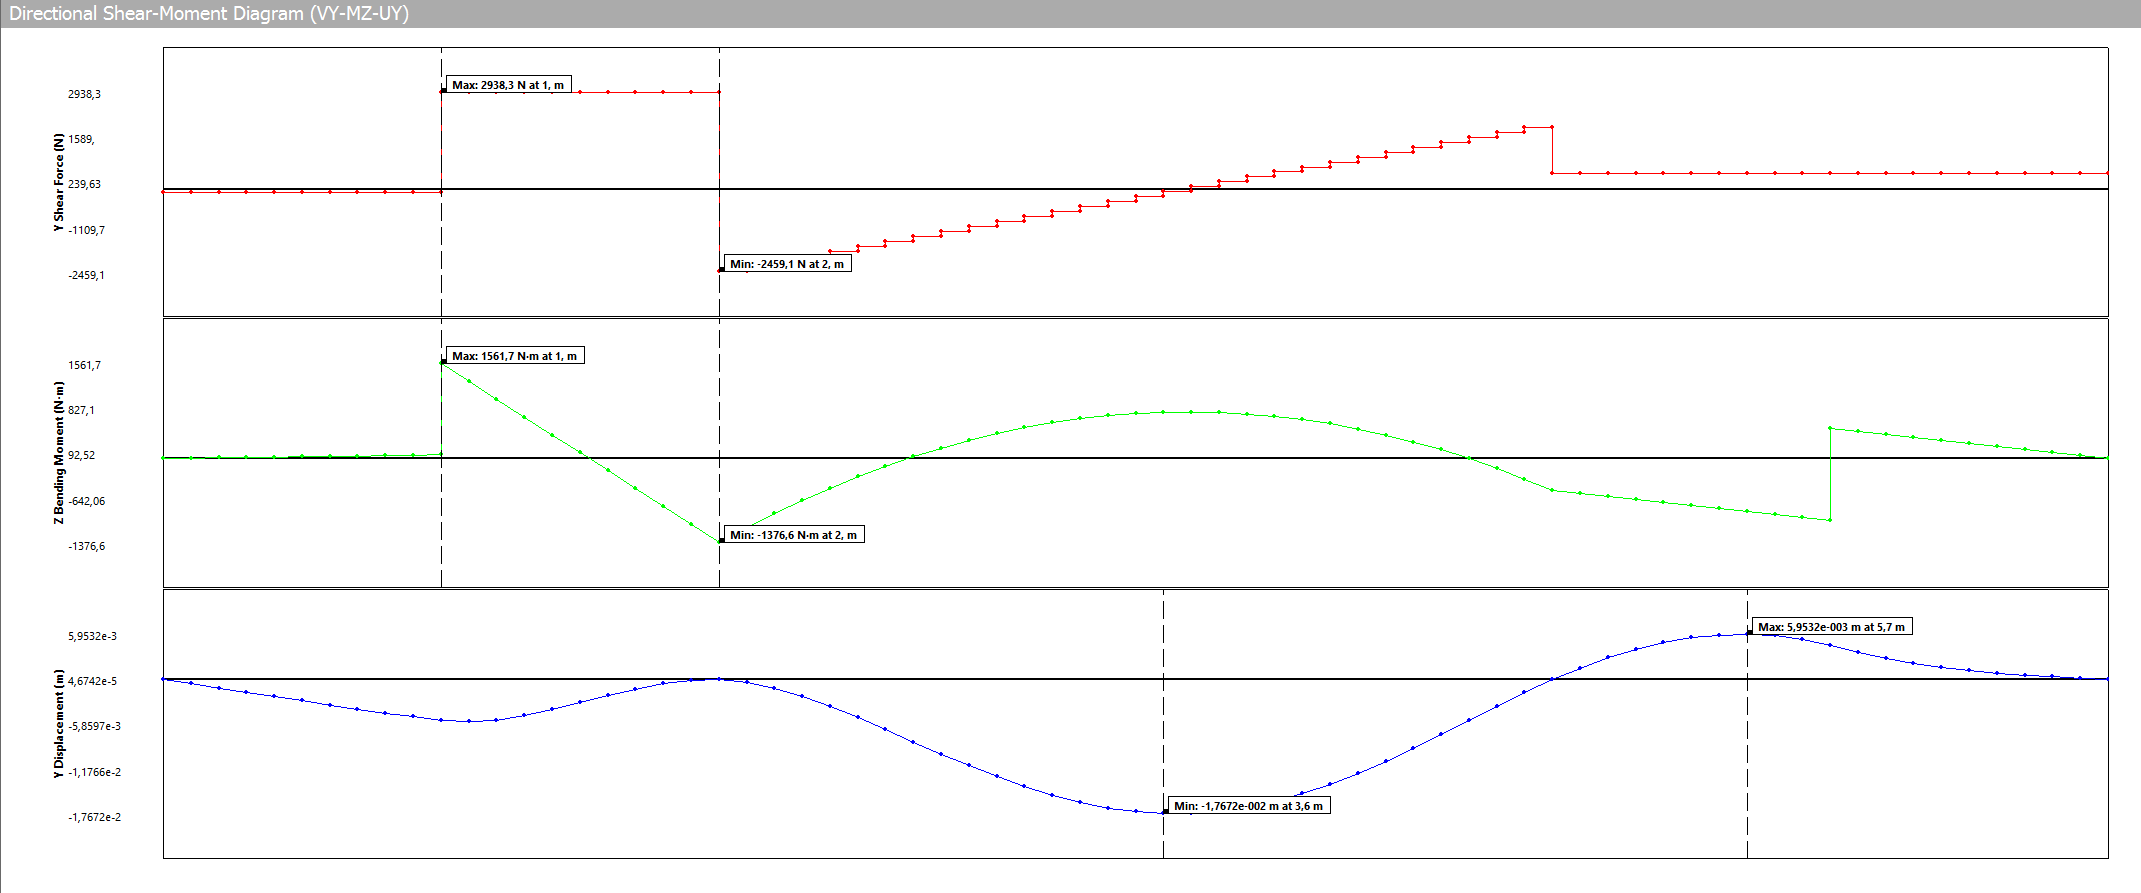
  
### Största böjspänningen
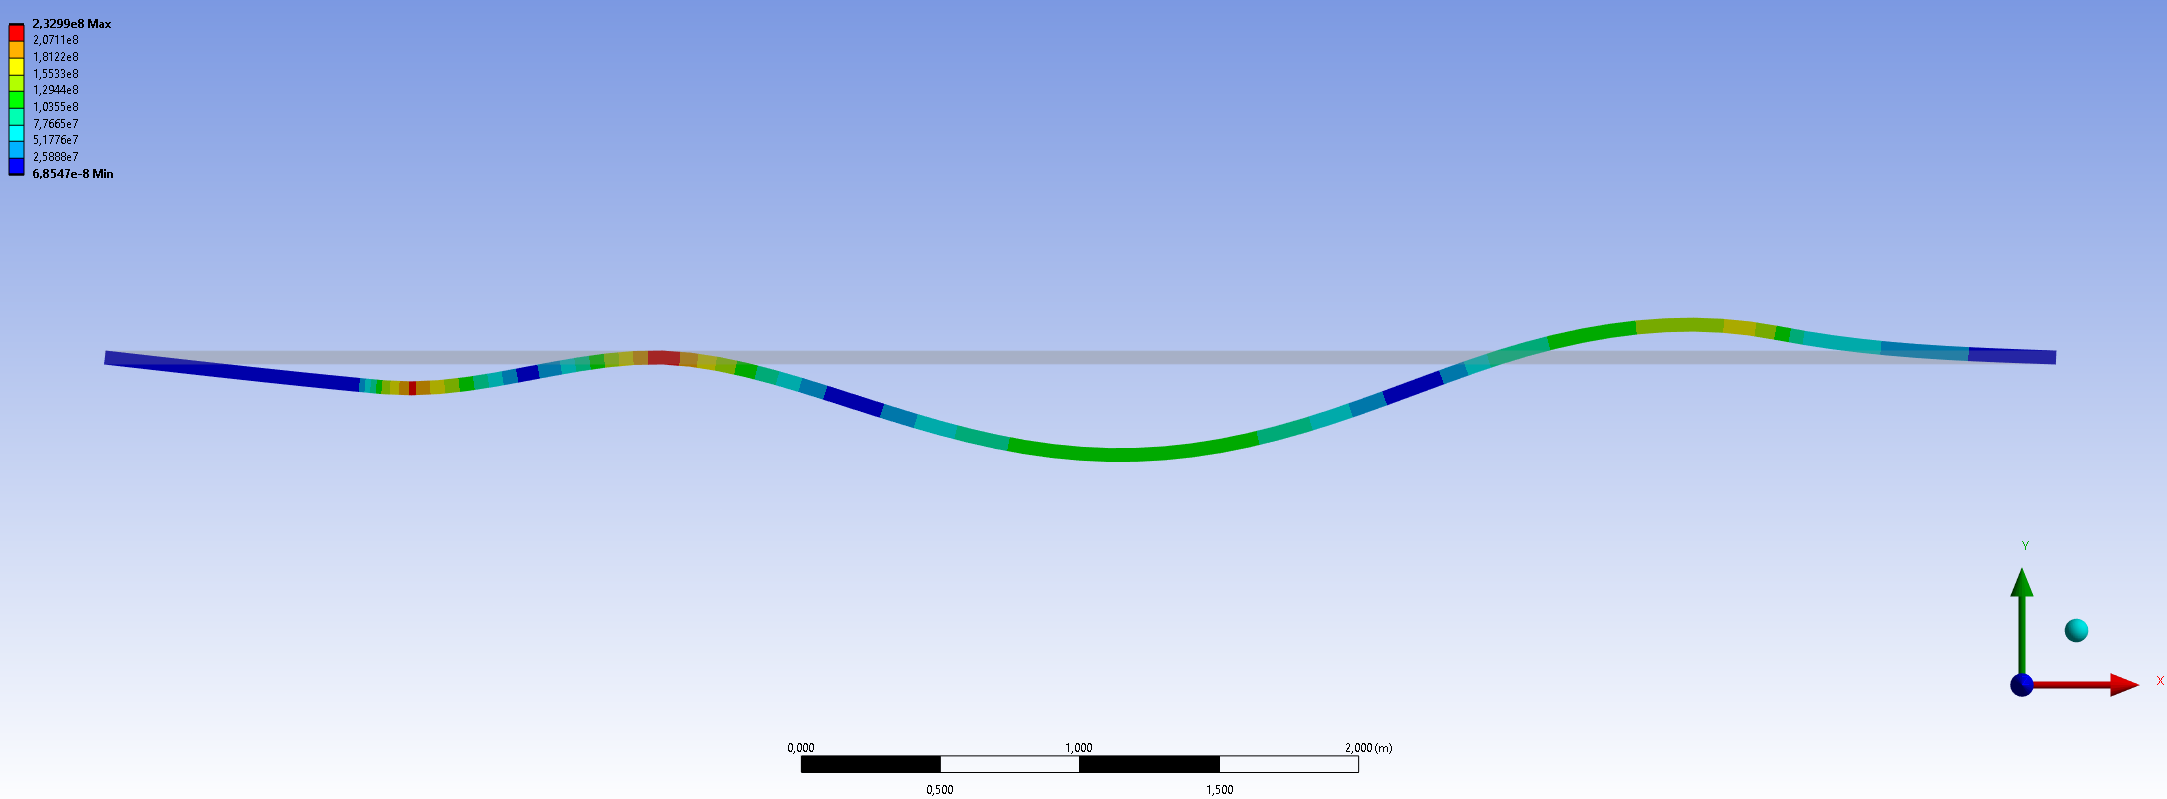
  
### Stödkrafterna (Vertikala)
**r1** = 61.68 N  
**r2** = 5472.4 N  
**r3** = 1478.2 N  
**r4** = 478.77 N  
  
---

## Uppgift 3  
*Presentera det etablerade ekvationssystemet Ka=foch var noga med att indikera kända och okända element i a- och f-vektorerna. Ni behöver inte här skriva ut alla element i K-matrisen, indikera enbart nollskilda element.*  
  
*Redovisa en tabell innehållande värden på utböjning i frihetsgrad 3 och 9 samt alla reaktionskrafter. Tabellen ska innehålla värden från ANSYS och från Pythonlösningen (enligt exempeltabellen nedan). Syftet med tabellen är att tydligt visa att de två modellerna ger liknande resultat och att vi därför kan ha större förtroende att våra FE-modeller är korrekt uppställda.*  
  
*Var tydlig med att ange hur många element som använts i ANSYS.*

### Bibliotek Introducerade  
- **Pylab**: Innehåller bibliotek som numpy och plotlib som kan vara nödvändiga i uppgiften
- **Sympy**: Är biblioteket som kommer att användas för majoriteten av alla beräkningsmetoder.
- **MTM026**: Ett special tillämpat bibliotek med nödvändiga funktioner som underlättar beräkningarnas gång

In [8]:
import pylab as pl
import sympy as sp
from mtm026 import *

Vi ansätter alla våra givna värden till respektive variabel som vi sedan kommer använda i beräkningarna. Vi definierar även alla reaktionskrafter/moment och försjutningar/böjningar.

In [9]:
P = 3000        #[N]
q0 = 1500       #[N/m]
M = 1500        #[Nm]
L1 = 1          #[m]
L2 = 3          #[m]
a = 0.05        #[m]
t = 0.002       #[m]
E = 200e9       #[Pa]
v = 0.3

r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12 = sp.symbols('r1:13')    # Reaktionskrafter
a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12 = sp.symbols('a1:13')    # Försjutningar


Vi tar sedan och beräknar den ogivna variabeln, yttröghetsmomentet. Vi använder Steiners sats för att beräkna den totala yttröghetsmomentet, och generella formler för rektangulära yttröghetsmoment. Vi delar upp profilen i fyra rektanglar där två av dem (Säg - högra och vänstra) är hela längden **a** och de andra två är **a** minus tjockleken **t** från båda sidor.

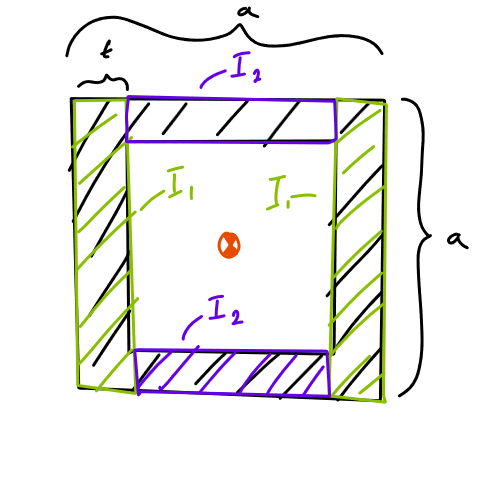

In [10]:

Iy_1 =  t*a**3/12       # yttröghetsmoment för rektangel H/L
Iy_2 =  ((a-2*t)*t**3)/12 # yttröghetsmoment för rektangel Ö/N
_y = (a/2-t/2)              # Avståndet till masscentrum, z-axeln
A_2 = (a-2*t)*t                    # Arean för rektangeln

I = 2*Iy_1 + 2*(Iy_2 + _y**2 * A_2)      # Totala yttröghetsmomentet

displayvar("I", I)

<IPython.core.display.Math object>

Sedan definierar vi styvhetsmatrisen **K** och kraftvektorn **f**.  
- Vi börjar med att beräkna alla elementens styvheter lokalt för sig. Det enda fallat där styvheten skilljer sig blir vid det tredje elementet, det ger att alla andra element har samma styvhet.
- Alla krafter läggs nu till på deras respektive plats, vid den andra punkten lägger vi in **-P** och momentet **-M**, vi lägger även in momentet **-M** i nod 5. För att sedan skapa den utbreda lasten **q0** applicerar vi den över hela element 3 i variabeln *fe*.  
  
Nu för att assemblera styvhetsmatrisen samt den utbreda lasten. Detta ger oss **K** och **f**

In [11]:
K = sp.zeros(12,12)
f = sp.zeros(12, 1)

ke1 = Ke_balk(E*I, L1)
ke3 = Ke_balk(E*I, L2)
ke2 = ke1
ke4 = ke1
ke5 = ke1

f[2] += -P
f[3] += -M 
f[9] += -M
fe = fe_balk(-q0, L2)

assem(K, ke1, dofs=[1,2,3,4])
assem(K, ke2, dofs=[3,4,5,6])
assem(K, ke3, dofs=[5,6,7,8])
assem(K, ke4, dofs=[7,8,9,10])
assem(K, ke5, dofs=[9,10,11,12])

assem(f, fe, dofs=[5,6,7,8])

displayvar("K", K)
displayvar("f", f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Två vektorer **r** (reaktionsvektor) och **a** (förskjutingsvektor) består nu av den okända variablerna samt randvillkoren 

In [12]:
r = sp.Matrix([r1, 0, 0, 0, r5, 0, r7, 0, 0, 0, r11, 0])
a = sp.Matrix([0, a2, a3, a4, 0, a6, 0, a8, a9, a10, 0, a12])

Nu för att lösa ekvationen!  
Vi ställer upp ekvationen på sitt fullständiga sätt, och skapar en lista av de variabler som vi ännu inte har.  
  
Genom att lösa detta med **Solve()** kan vi nu lösa ut systemet och få svaret nedan!

In [13]:
eq_sys = sp.Eq(K*a, f + r)
display(eq_sys)

unkown = [r1, a2, a3, a4, r5, a6, r7, a8, a9, a10, r11, a12]
sol = sp.solve(eq_sys, unkown)

displayvar("Solution", sol)

Eq(Matrix([
[                               177254.4*a2 - 354508.8*a3 + 177254.4*a4],
[                                118169.6*a2 - 177254.4*a3 + 59084.8*a4],
[                              -177254.4*a2 + 709017.6*a3 + 177254.4*a6],
[                                 59084.8*a2 + 236339.2*a4 + 59084.8*a6],
[-354508.8*a3 - 177254.4*a4 - 157559.466666667*a6 + 19694.9333333333*a8],
[  177254.4*a3 + 59084.8*a4 + 157559.466666667*a6 + 19694.9333333333*a8],
[177254.4*a10 - 19694.9333333333*a6 + 157559.466666667*a8 - 354508.8*a9],
[ 59084.8*a10 + 19694.9333333333*a6 + 157559.466666667*a8 - 177254.4*a9],
[                              177254.4*a12 - 177254.4*a8 + 709017.6*a9],
[                               236339.2*a10 + 59084.8*a12 + 59084.8*a8],
[                            -177254.4*a10 - 177254.4*a12 - 354508.8*a9],
[                              59084.8*a10 + 118169.6*a12 + 177254.4*a9]]), Matrix([
[         r1],
[          0],
[      -3000],
[      -1500],
[r5 - 2250.0],
[    -1125.0],

<IPython.core.display.Math object>

In [28]:
from tabulate import tabulate
import numpy as np

a_py = np.array([0, sol[a2], sol[a3], sol[a4], 0, sol[a6], 0, sol[a8], sol[a9], sol[a10], 0, sol[a12]])
r_py = np.array([sol[r1], f[1], f[2], f[3], sol[r5], f[5], sol[r7], f[7], f[8], f[9], sol[r11], f[11]])
a_an = np.array([0, 0, -5.3929e-003, 0, 0, 0, 0, 0, 4.4382e-003, 0, 0, 0])
r_an = np.array([61.68, f[1], f[2], f[3], 5472.40, f[5], 1478.20, f[7], f[8], f[9], 478.77, f[11]])

def separate_values(a, r):
    förskjutningar = [a[i] for i in range(len(a)) if i % 2 == 0]
    böjningar = [a[i] for i in range(len(a)) if i % 2 != 0]
    krafter = [r[i] for i in range(len(r)) if i % 2 == 0]
    moment = [r[i] for i in range(len(r)) if i % 2 != 0]
    return förskjutningar, böjningar, krafter, moment

def format_value(val, decimals=1, factor=1):
    try:
        return f"{float(val) * factor:.{decimals}f}"
    except ValueError:
        return str(val)


# Separera data korrekt
py_förskjutningar, py_böjningar, py_krafter, py_moment = separate_values(a_py, r_py)
an_förskjutningar, an_böjningar, an_krafter, an_moment = separate_values(a_an, r_an)

# Skapa tabeller med korrekt enhet och avrundning
py_table = [
    ["Förskjutningar (m)"] + [format_value(val, 6) for val in py_förskjutningar],
    # ["Böjningar (mm)"] + [format_value(val, 1000) for val in py_böjningar],
    ["Krafter (N)"] + [format_value(val, 2) for val in py_krafter],
    ["Moment (Nm)"] + [format_value(val, 2) for val in py_moment],
]

an_table = [
    ["Förskjutningar (m)"] + [format_value(val, 6) for val in an_förskjutningar],
    # ["Böjningar (mm)"] + [format_value(val, 1000) for val in an_böjningar],
    ["Krafter (N)"] + [format_value(val, 2) for val in an_krafter],
    ["Moment (Nm)"] + [format_value(val, 2) for val in an_moment],
]

# Sammanställ resultat
table = [
    ["Python", tabulate(py_table, tablefmt="plain")],
    ["ANSYS", tabulate(an_table, tablefmt="plain")],
]

# Skriv ut tabellen
print("\nResultat:")
print(tabulate(table, headers=["Metod", "Data"], tablefmt="grid"))



Resultat:
+---------+----------------------------------------------------------------------------------+
| Metod   | Data                                                                             |
+=========+==================================================================================+
| Python  | Förskjutningar (m)   0        -0.005243      0        0         0.004429    0    |
|         | Krafter (N)         59.75  -3000          5475.96  1475.96      0         488.32 |
|         | Moment (Nm)          0     -1500         -1125     1125     -1500           0    |
+---------+----------------------------------------------------------------------------------+
| ANSYS   | Förskjutningar (m)   0        -0.005393      0       0        0.004438    0      |
|         | Krafter (N)         61.68  -3000          5472.4  1478.2      0         478.77   |
|         | Moment (Nm)          0     -1500         -1125    1125    -1500           0      |
+---------+----------------------------